In [2]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


Target - Loan Status
0- loan rejected
1- loan approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
## Separate x and y

x = df.drop(columns = ["loan_status", "id"])
y = df[["loan_status"]]

In [7]:
x.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [8]:
y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [9]:
### Apply prepocessing

cat = list(x.columns[x.dtypes=="object"])
con = list(x.columns[x.dtypes != "object"])

In [10]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [11]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "mean"),
    StandardScaler()
)

In [14]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [15]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform = "pandas")

In [16]:
x_pre = pre.fit_transform(x)

In [17]:
x_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.068949,1.475156,0.075506,2.836651,1.737297,0.553626,1.039036,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
58641,0.074446,-0.929223,-1.187200,0.140632,0.676227,2.080493,0.542655,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
58642,-0.754307,-0.528494,0.580588,-0.434518,1.753773,-0.100746,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58643,-0.920057,-0.897587,-0.682117,-0.758041,-0.585854,0.117378,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y ,test_size=0.2)

In [19]:
#### model building

from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()
params = {
    "n_estimators" : [50, 100, 200, 300],
    "max_depth" : [2, 3, 4],
    "min_samples_split" : [5, 6, 7,8 ]
}

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
rscv = RandomizedSearchCV(
    estimator= model1,
    param_distributions=params,
    scoring = "f1_macro",
    cv = 5,
    n_jobs= -1
)

In [22]:
rscv.fit(xtrain, ytrain)

d:\ml codes\.venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='f1_macro')

In [23]:
best = rscv.best_estimator_
best

RandomForestClassifier(max_depth=4, min_samples_split=6, n_estimators=300)

In [24]:
best.score(xtrain, ytrain)

0.9336047403870747

In [25]:
best.score(xtest, ytest)

0.9374200699121835

Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
model2 = GradientBoostingClassifier()

params = {
    "n_estimators":[50, 100],
    "max_depth" : [2, 3, 4],
    "learning_rate" : [0.1, 0.2]
}

In [30]:
rscv_gb = RandomizedSearchCV(
    estimator= model2,
    param_distributions= params,
    scoring="f1_macro",
    cv = 5,
    n_jobs = -1
)

rscv_gb.fit(xtrain, ytrain)

d:\ml codes\.venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [2, 3, 4],
                                        'n_estimators': [50, 100]},
                   scoring='f1_macro')

In [31]:
best2 = rscv_gb.best_estimator_

In [32]:
best2.score(xtrain, ytrain)

0.9531716258845596

XGBoost

In [33]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.6/124.9 MB 41.0 MB/s eta 0:00:04
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 3.9/124.9 MB 26.0 MB/s eta 0:00:05
   - -------------------------------------- 4.5/124.9 MB 2.1 MB/s eta 0:00:57
   -- ------------------------------------- 6.3/124.9 MB 2.8 MB/s eta 0:00:44
   -- ------------------------------------- 9.2/124.9 MB 3.8 M


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from warnings import filterwarnings
filterwarnings("ignore")

In [36]:
import pandas as pd
df = pd.read_csv("booking_train.csv")

In [38]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [39]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

Target- booking_status
1. 0- Not cancelled
2. 1 - Cancelled

In [41]:
x = df.drop(columns = ["id", "booking_status"])
y= df[["booking_status"]]

In [42]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [43]:
y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [44]:
y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

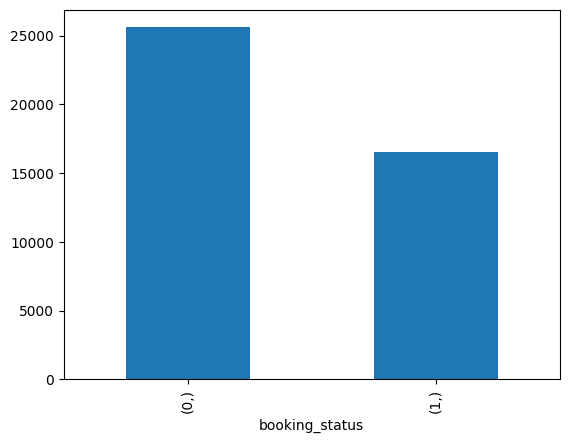

In [45]:
y.value_counts().plot(kind="bar")

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [47]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform = "pandas")

In [48]:
xpre = num_pipe.fit_transform(x)

In [49]:
xpre

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.585992,0.428551,-0.173408,-0.060506,-0.101479,0.954088,1.842849
42096,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.862087,-2.441040,0.497095,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,3.233919,-0.737691
42097,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,2.320411,0.409661,-0.209778,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.230659,-0.737691
42098,-1.753925,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.219810,0.409661,1.203968,-0.776617,-1.149928,-0.173408,-0.060506,-0.101479,0.415567,-0.737691


In [50]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xpre, y, test_size=0.2)

Model Building

In [51]:
import xgboost as xg

model1 = xg.XGBClassifier(
    max_depth = 3,
    n_estimators = 200
)

In [52]:
model1.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
model1.score(xtrain, ytrain)

0.8304928741092636

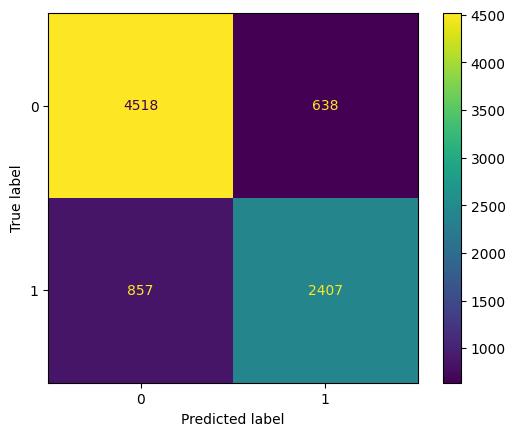

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model1, xtest, ytest)

In [55]:
ypred = model1.predict(xtest)

In [56]:
ypred

array([0, 1, 0, ..., 1, 0, 0])

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      5156
           1       0.79      0.74      0.76      3264

    accuracy                           0.82      8420
   macro avg       0.82      0.81      0.81      8420
weighted avg       0.82      0.82      0.82      8420



In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, xtrain, ytrain, cv=5, scoring= "f1_macro")
scores

array([0.79862816, 0.80833689, 0.80976657, 0.81363419, 0.81273163])

In [60]:
scores.mean()

np.float64(0.8086194889924851)

ROC_AUC scores

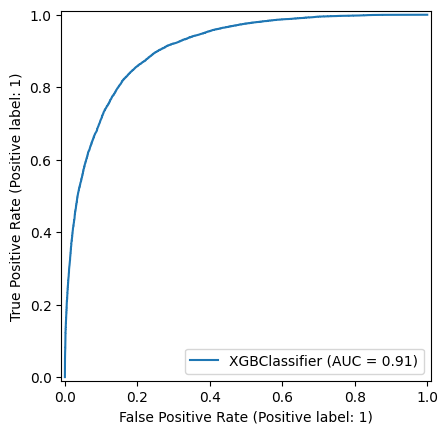

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model1, xtrain, ytrain)   

Feature Importance

In [62]:
model1.feature_importances_

array([0.01784128, 0.00889312, 0.01876447, 0.0124031 , 0.01756535,
       0.10164235, 0.01959481, 0.11167085, 0.05681515, 0.03820219,
       0.00983727, 0.23348013, 0.06573107, 0.00068386, 0.00201604,
       0.04799547, 0.23686351], dtype=float32)

In [63]:
imp = pd.Series(model1.feature_importances_, index = xtrain.columns)

In [65]:
imp.sort_values(ascending=False)

no_of_special_requests                  0.236864
market_segment_type                     0.233480
lead_time                               0.111671
required_car_parking_space              0.101642
repeated_guest                          0.065731
arrival_year                            0.056815
avg_price_per_room                      0.047995
arrival_month                           0.038202
room_type_reserved                      0.019595
no_of_weekend_nights                    0.018764
no_of_adults                            0.017841
type_of_meal_plan                       0.017565
no_of_week_nights                       0.012403
arrival_date                            0.009837
no_of_children                          0.008893
no_of_previous_bookings_not_canceled    0.002016
no_of_previous_cancellations            0.000684
dtype: float32

<Axes: >

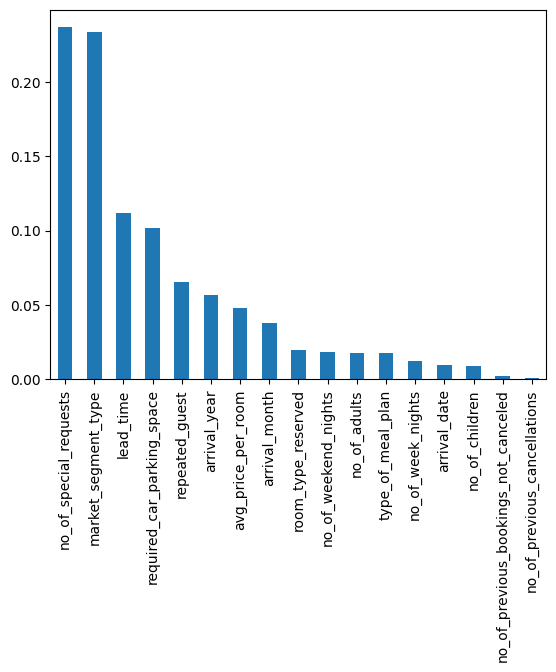

In [69]:
imp.sort_values(ascending=False).plot(kind = "bar")